# Laboratorio No. 2 - Modelacion y Simulacion

### 2.1 Crecimiento poblacional

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [15]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
y0 = 15
y4 = 60
N = 300
t_final = 12
dt = 0.1

### Funcion para calcular K

In [4]:
def func(k):
    return y0 * np.exp(k * 4 * (1 - y0/(2*N))) - y4

k = fsolve(func, 0.1)[0]

### Funcion para la ecuacion diferencial

In [5]:
def dy_dt(y, k, N):
    return k * (1 - y/N) * y

### Metodo de Euler

In [6]:
t = np.arange(0, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y0

for i in range(1, len(t)):
    y[i] = y[i-1] + dy_dt(y[i-1], k, N) * dt

### Calculos

In [17]:
y_12 = y[-1]
y_max_growth = N / 2
t_max_growth = np.interp(y_max_growth, y, t)

### Resultados

In [13]:
print(f"Tasa de crecimiento (k): {k:.4f}")
print(f"Población después de 12 días: {y_12:.0f} mariposas")
print(f"La población crece más rápido cuando hay {y_max_growth:.0f} mariposas")
print(f"El crecimiento máximo ocurre aproximadamente en el día {t_max_growth:.1f}")

Tasa de crecimiento (k): 0.3555
Población después de 12 días: 236 mariposas
La población crece más rápido cuando hay 150 mariposas
El crecimiento máximo ocurre aproximadamente en el día 8.4


### Grafica

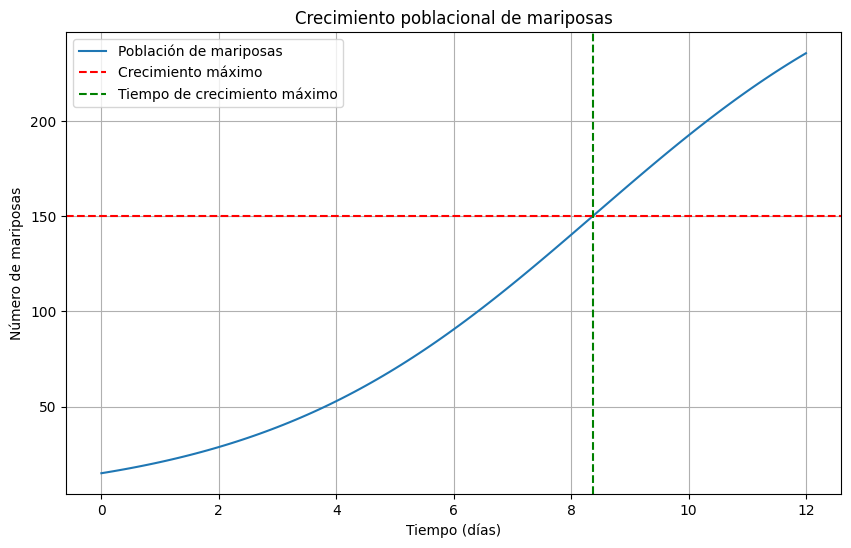

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Población de mariposas')
plt.axhline(y=y_max_growth, color='r', linestyle='--', label='Crecimiento máximo')
plt.axvline(x=t_max_growth, color='g', linestyle='--', label='Tiempo de crecimiento máximo')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de mariposas')
plt.title('Crecimiento poblacional de mariposas')
plt.legend()
plt.grid(True)
plt.show()